Variables de entrada

edad_a: Representa la edad del boxeador A. Se eliminaron todas las filas que tenian este campo en nulo.
edad_b: Representa la edad del boxeador B. Se eliminaron todas las filas que tenian este campo en nulo.
altura_a: Representa la altura del boxeador A. Se eliminaron todas las filas que tenian este campo en nulo.
altura_b: Representa la altura del boxeador B. Se eliminaron todas las filas que tenian este campo en nulo.
ganadas_a: Representa la cantidad de victorias históricas del boxeador A.
ganadas_b: Representa la cantidad de victorias históricas del boxeador B.
perdidas_a: Representa la cantidad de derrotas históricas del boxeador A.
perdidas_b: Representa la cantidad de derrotas históricas del boxeador B.
kos_a: Representa la cantidad de knock outs realizados por el boxeador A.
kos_b: Representa la cantidad de knock outs realizados por el boxeador B.
posicion_a: Representa si el boxeador A es zurdo o derecho.
posicion_b: Representa si el boxeador B es zurdo o derecho.
    

Variables de salida

gano: Valores True o False. Representa si el boxeador gano o perdió la pelea.

    
Variables no utilizadas
decision:
juez1_a:
juez1_b:
juez2_a:
juez2_b:
juez3_a:
juez3_b:
alcance_mano_a:
alcance_mano_b:
empatadas_a: Representa la cantidad de empates históricos del boxeador A.
empatadas_b: Representa la cantidad de empates históricos del boxeador B.
peso_a: Representa el peso del boxeador A.
peso_b: Representa el peso del boxeador B.    

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import clean_dataframe

In [3]:
df = pd.read_csv("bouts_out_new.csv")

In [4]:
df = clean_dataframe(df)

In [12]:
df.head()

,edad_a,edad_b,altura_a,altura_b,posicion_a,posicion_b,ganadas_a,ganadas_b,perdidas_a,perdidas_b,empatadas_a,empatadas_b,kos_a,kos_b,resultado,gano
0,35.0,27.0,179.0,175.0,orthodox,orthodox,37,49,0,1,0,1,33,34.0,draw,False
1,26.0,31.0,175.0,185.0,orthodox,orthodox,48,50,1,2,1,1,34,32.0,win_A,True
2,28.0,26.0,176.0,175.0,orthodox,orthodox,23,47,0,1,1,1,13,33.0,win_B,False
3,25.0,29.0,175.0,174.0,orthodox,orthodox,46,31,1,3,1,0,32,19.0,win_A,True
4,25.0,35.0,175.0,170.0,orthodox,orthodox,45,40,1,4,1,0,32,33.0,win_A,True


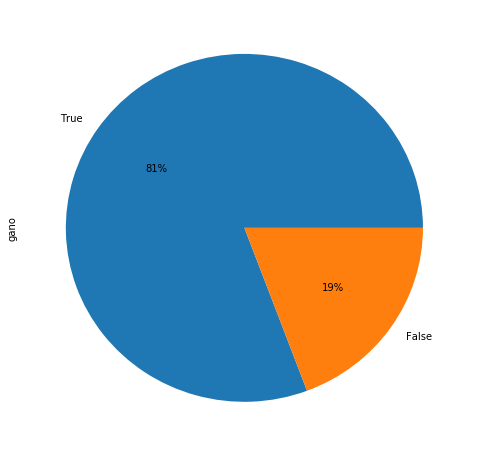

In [21]:
df.gano.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

Los datos se encuentran desbalanceados, ya que el 81% de los mismos corresponde a una victoria por parte del boxeador A, y solo el 19% de los datos corresponden a victoria del boxeador B.

Como consecuencia, el modelo tendrá dificultades a la hora de predecir una derrota.

In [9]:
df['diff_ganadas_a_b'] = df.ganadas_a - df.ganadas_b

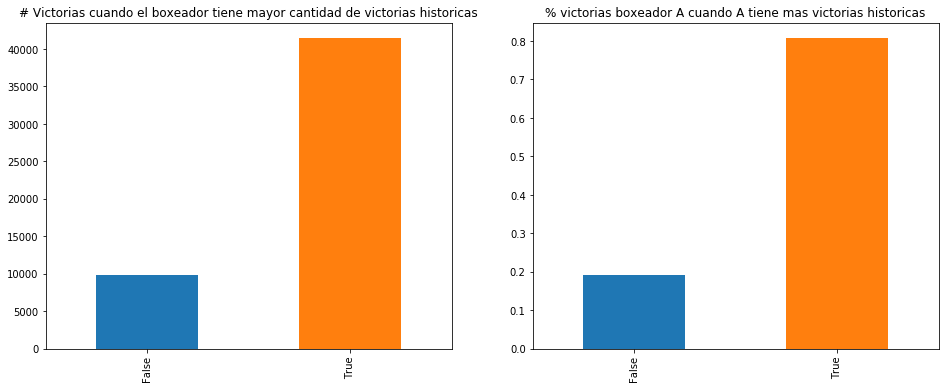

In [10]:
f,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].set_title('# Victorias cuando el boxeador tiene mayor cantidad de victorias historicas')
df[df.diff_ganadas_a_b > 0].gano.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('% victorias cuando ne mas victorias historicas')
df[df.diff_ganadas_a_b > 0].gano.value_counts(normalize = True).sort_index().plot.bar(ax=ax[1])

Se puede observar que cuando un boxeador tiene mayor cantidad de victorias históricas, el 80% de las veces gana la pelea.

In [6]:
df['diff_perdidas_a_b'] = df.perdidas_a - df.perdidas_b

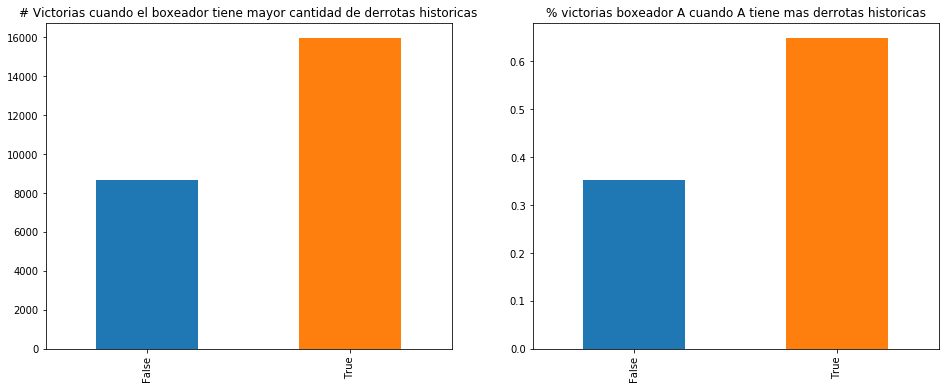

In [7]:
f,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].set_title('# Victorias cuando el boxeador tiene mayor cantidad de derrotas historicas')
df[df.diff_perdidas_a_b > 0].gano.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('% victorias boxeador A cuando A tiene mas derrotas historicas')
df[df.diff_perdidas_a_b > 0].gano.value_counts(normalize = True).sort_index().plot.bar(ax=ax[1])

Se puede observar que cuando un boxeador tiene mayor cantidad de derrotas históricas, el 67% de las veces gana la pelea.

In [6]:
df['diff_empatadas_a_b'] = df.empatadas_a - df.empatadas_b

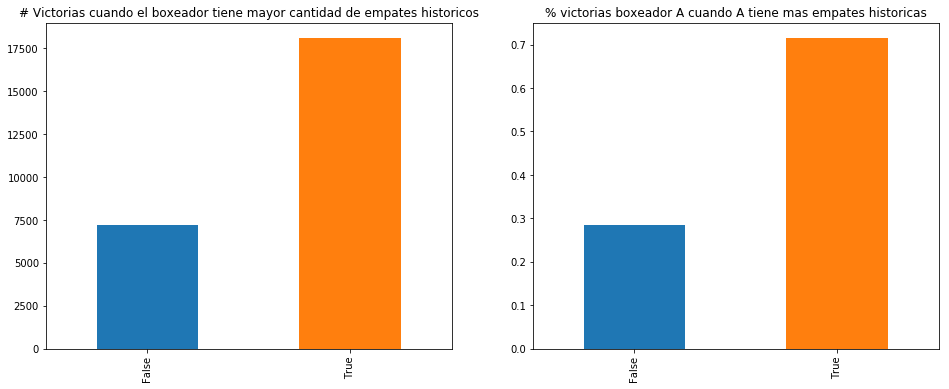

In [7]:
f,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].set_title('# Victorias cuando el boxeador tiene mayor cantidad de empates historicos')
df[df.diff_empatadas_a_b > 0].gano.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('% victorias boxeador A cuando A tiene mas empates historicas')
df[df.diff_empatadas_a_b > 0].gano.value_counts(normalize = True).sort_index().plot.bar(ax=ax[1])

Se puede observar que cuando un boxeador tiene mayor cantidad de empates históricos, el 71% de las veces gana la pelea.